# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [1]:
# Install the datasets library
!pip install datasets
!pip install sentencepiece
!pip install transformers datasets
!pip install transformers[torch]
!pip install accelerate
!pip install accelerate>=0.20.1
!pip install huggingface_hub
!pip install  -q transformers datasets
!pip install neattext
!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [2]:
##for handling path of my datasets
import os
from google.colab import drive

##for data handling:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split

##for visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import neattext.functions as nfx
import re

##modelling:
import nltk
from nltk.corpus import stopwords
import string
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import mean_squared_error
from datasets import load_metric
from sklearn.metrics import f1_score


In [3]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [4]:
# drive.mount('/content/drive')

In [5]:
!git clone https://github.com/codedzifa/NLP-Sentiment-Analysis.git

Cloning into 'NLP-Sentiment-Analysis'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 1), reused 14 (delta 1), pack-reused 0
Receiving objects: 100% (18/18), 2.43 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (1/1), done.


#### LOADING DATASET

In [6]:


# Load the dataset and display some values
# df_train = pd.read_csv('../data/Train.csv')
# df_train = pd.read_csv('/content/drive/My Drive/Sentiment-Analysis-Model/data/Train.csv')
df_train = pd.read_csv('/content/NLP-Sentiment-Analysis/data/Train.csv')

# A way to eliminate rows containing NaN values
df_train = df_train[~df_train.isna().any(axis=1)]


# Load the dataset and display some values
# df_test = pd.read_csv('../data/Test.csv')
# df_test = pd.read_csv('/content/drive/My Drive/Sentiment-Analysis-Model/data/Test.csv')
df_test = pd.read_csv('/content/NLP-Sentiment-Analysis/data/Test.csv')

# A way to eliminate rows containing NaN values
df_test = df_test[~df_test.isna().any(axis=1)]

In [7]:
##creating a copy

train_data= df_train.copy()
test_data= df_test.copy()

## CRISP-DM Framework

- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment


#### DATA UNDERSTANDING

##### EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
train_data.sample(5)

,tweet_id,safe_text,label,agreement
8316,C4SMJTE4,"Measles at ""my"" Stater Bros?! This is why I al...",0.0,1.000000
8202,ACHTTN4X,Please vaccinate! Most of the anti vaxx crap i...,1.0,1.000000
7792,GSQWNLTD,"Don't want to vaccinate your kids? Fine, don...",1.0,1.000000
618,AZM9EKG5,<user> <user> I just hope <user> doesn't miss ...,0.0,0.666667
6468,14FKBDJI,Associated Press\nVaccine spray may not work f...,0.0,0.666667


In [9]:
test_data.sample(5)

,tweet_id,safe_text
4263,TDIQ8QVU,People will read a food label longer than a dr...
2612,I0NIR0P4,AP Disney gave input on measles health message...
577,3X6HN1VI,Plans for 1st efficacy trials of Ebola vaccine...
1820,CGU3MEYG,Measles diagnosed in Spokane adult for first t...
2178,F3RWM7KO,Oakland Co. judge to decide if parents must va...


In [10]:
#Getting info
data=[train_data, test_data]
names=["df_train", "df_test"]

for m, i in zip(data, names):
  print(f"the info", i,"dataset are: ", "\n\n", m.info(), "\n\n", "---"*20 )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
the info df_train dataset are:  

 None 

 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5176 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 121.3+ KB
the info df_test dataset are:  

 None 

 ------------------------------------------------------------


In [11]:
# We look at the number of positive, negative and neutral reviews
train_data.label.value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

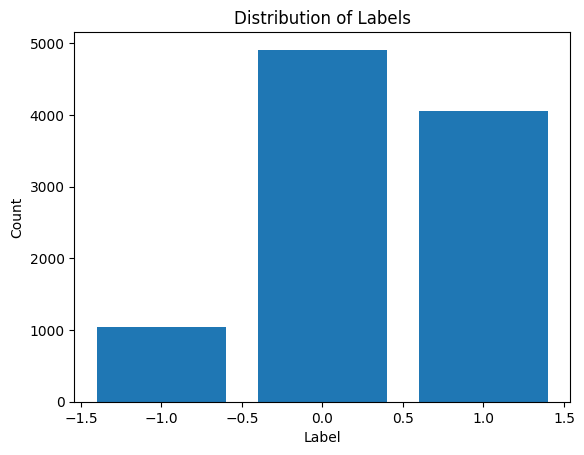

In [12]:
# Plot the distribution of labels
label_counts = train_data['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [13]:
# The count of the agrremtns
train_data.agreement.value_counts()

1.000000    5866
0.666667    3894
0.333333     239
Name: agreement, dtype: int64

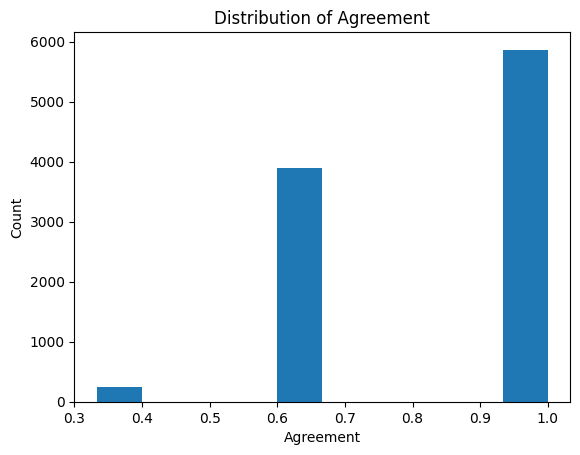

In [14]:
# Plot the distribution of 'agreement'
plt.hist(train_data['agreement'])
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Distribution of Agreement')
plt.show()

The distribution of sentiments in the dataset, as depicted by the count plot, shows the prevalence of different sentiment labels within the Twitter posts related to COVID-19 vaccinations.
* Sentiment Label 0 (Neutral):
The sentiment label "0" (neutral) has the highest count, with approximately 5000 instances. This suggests that a significant portion of the collected tweets exhibit a neutral sentiment when it comes to discussing COVID-19 vaccinations. Neutral sentiments often indicate that the tweets may not strongly express positive or negative opinions but rather present factual information or observations.

* Sentiment Label 1 (Positive):
The sentiment label "1" (positive) follows with around 4000 instances. This indicates that a substantial number of tweets show a positive sentiment towards COVID-19 vaccinations. These tweets might express support for vaccinations, share positive experiences, or provide information about vaccination availability and benefits.

* Sentiment Label -1 (Negative):
The sentiment label "-1" (negative) has the lowest count, with approximately 1000 instances. This suggests that a relatively smaller portion of the collected tweets exhibit a negative sentiment towards COVID-19 vaccinations. Negative sentiments can encompass concerns, skepticism, or criticism about the vaccines, their safety, or potential side effects.

In [15]:
# Calculate the correlation between 'label' and 'agreement'
correlation = df_train['label'].corr(df_train['agreement'])

# Print the correlation value
print(f"Correlation: {correlation}")

Correlation: 0.13815479087588003


In [16]:
#Checking the length of the reviews
review_legnth = train_data.safe_text.str.len()

max(review_legnth)

#Legnth of the shortest review
min(review_legnth)

print(f"max review_legnth : {max(review_legnth)}")
print(f"min review_legnth : {min(review_legnth)}")

max review_legnth : 153
min review_legnth : 3


[('<url>', 4612), ('<user>', 4517), ('to', 3407), ('the', 3388), ('of', 2196), ('a', 2133), ('in', 1897), ('and', 1827), ('measles', 1747), ('I', 1604)]


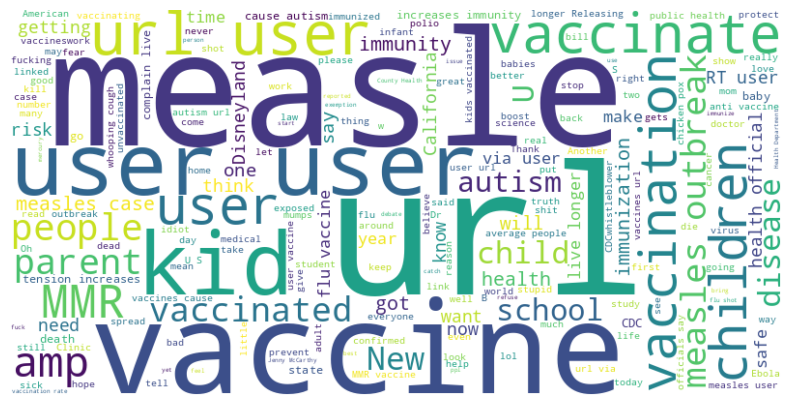

In [17]:
#Having a word count

# Concatenate all the 'safe_text' into a single string
text = ' '.join(train_data['safe_text'])

# Split the text into words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Display the most common words
print(word_counts.most_common(10))

# Generate the word cloud with a white background
cloud_two_cities = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()


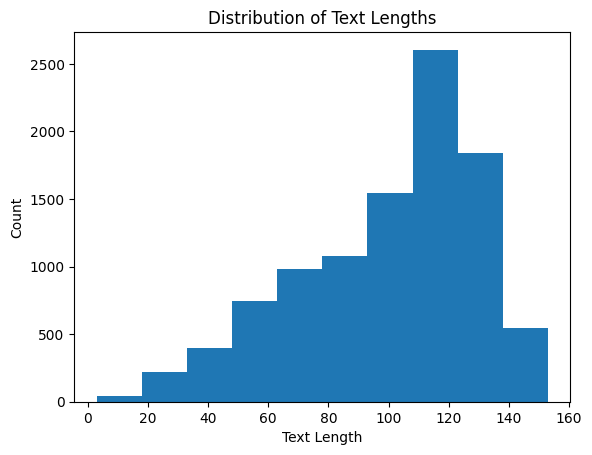

In [18]:
# Calculate the length of each text in 'safe_text'
text_lengths = train_data['safe_text'].apply(len)

# Plot the distribution of text lengths
plt.hist(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')
plt.show()

#### DATA CLEANING

Issues to treat:


*   Remove unneccesary columns.
*   Remove emojis and other characters from safe text column.
*   Remove punctuations from the safe text column
*   Changing all text to lower cases.


In [19]:
#Checking for mIssing values
data=[train_data, test_data]
names=["df_train", "df_test"]

for m, i in zip(data, names):
  print(f"the missing values in the", i,"dataset are: ", "\n\n", m.isna().sum(), "\n\n", "---"*20 )

the missing values in the df_train dataset are:  

 tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64 

 ------------------------------------------------------------
the missing values in the df_test dataset are:  

 tweet_id     0
safe_text    0
dtype: int64 

 ------------------------------------------------------------


In [20]:
#check for duplicates
train_data.duplicated().sum()

0

In [21]:
# Clean the 'safe_text' column (example: remove URLs and special characters)
train_data['safe_text'] = train_data['safe_text'].str.replace(r'<url>', '')  # Remove <url> tag
test_data['safe_text'] = test_data['safe_text'].str.replace(r'<url>', '')  # Remove <url> tag

# Remove emojis and other special characters
emojis = re.compile(r'[^\w\s@#$%^*()<>/|}{~:&]')
train_data["safe_text"] = train_data["safe_text"].str.replace(emojis, '')
test_data["safe_text"] = test_data["safe_text"].str.replace(emojis, '')

# # Remove punctuation
punctuation = string.punctuation
train_data["safe_text"] = train_data["safe_text"].str.translate(str.maketrans('', '', punctuation))
test_data["safe_text"] = test_data["safe_text"].str.translate(str.maketrans('', '', punctuation))

# remove hashtags
train_data['safe_text'] = train_data['safe_text'].apply(nfx.remove_hashtags)
test_data['safe_text'] = test_data['safe_text'].apply(nfx.remove_hashtags)

# Turn the safe_text column into lowercase
train_data["safe_text"] = train_data["safe_text"].str.lower()
test_data["safe_text"] = test_data["safe_text"].str.lower()

# remove multiple white spaces
def stripSpace(text):
    return text.strip()
train_data['safe_text'] = train_data['safe_text'].apply(nfx.remove_multiple_spaces)
train_data['safe_text'] = train_data['safe_text'].apply(stripSpace)

# remove RT and user handles
def removeRT(text):
    return text.replace("RT" , "")
train_data['safe_text'] = train_data['safe_text'].apply(lambda x: nfx.remove_userhandles(x))
train_data['safe_text'] = train_data['safe_text'].apply(removeRT)

#Preview of the safe text column
train_data['safe_text'].head(10)

0    me amp the big homie meanboy3000 meanboy mb mb...
1    im 100 thinking of devoting my career to provi...
2    whatcausesautism vaccines do not vaccinate you...
3    i mean if they immunize my kid with something ...
4    thanks to user catch me performing at la nuit ...
5    user a nearly 67 year old study when mental he...
6    study of more than 95000 kids finds no link be...
7                      psa vaccinate your fucking kids
8    coughing extra on the shuttle and everyone thi...
9    aids vaccine created at oregon health amp scie...
Name: safe_text, dtype: object

In [22]:
#REMOVING STOPWORDS
# Download the stop words (only required for the first time)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Remove stop words
stop_words = set(stopwords.words('english'))
train_data['safe_text'] = train_data['safe_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
test_data['safe_text'] = test_data['safe_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


# Export DataFrame as CSV

In [24]:
# Save df_train
train_data.to_csv('/content/NLP-Sentiment-Analysis/data/train_data.csv', index=False)



# Save df_test
test_data.to_csv('/content/NLP-Sentiment-Analysis/data/test_data.csv', index=False)

#### IMPORTING CLEANED DATASET

In [25]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [26]:
# Load the dataset and display some values
df = pd.read_csv('/content/NLP-Sentiment-Analysis/data/train_data.csv')

# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]

I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).

There are multiple ways to do split the dataset. You'll see two commented line showing you another one.

#### TRAIN TEST SPLIT

In [27]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [28]:
train.head()

,tweet_id,safe_text,label,agreement
9303,YMRMEDME,mickeys measles gone international,0.0,1.000000
3907,5GV8NEZS,s1256 new extends exemption charitable immunit...,0.0,1.000000
795,EI10PS46,user ignorance vaccines isnt dangerous innocen...,1.0,0.666667
5791,OM26E6DG,pakistan partly suspends polio vaccination pro...,0.0,1.000000
3431,NBBY86FX,news ive gone like 1000 mmr,0.0,1.000000


In [29]:
eval.head()

,tweet_id,safe_text,label,agreement
6569,R7JPIFN7,childrens museum houston offer free vaccinations,1.0,1.000000
1754,2DD250VN,user properly immunized prior performance kid ...,1.0,1.000000
3325,ESEVBTFN,user thx posting vaccinations imperative dear ...,1.0,1.000000
1485,S17ZU0LC,baby exactly everyone needs vaccinate via user,1.0,0.666667
4175,IIN5D33V,meeting tonight 830pm room 322 student center ...,1.0,1.000000


In [30]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 4), eval is (2000, 4)


#### SAVING THE TRAIN AND EVAL SUBSET

In [31]:
# Save splitted subsets
train.to_csv("/content/NLP-Sentiment-Analysis/data/train_subset.csv", index=False)
eval.to_csv("/content/NLP-Sentiment-Analysis/data/eval_subset.csv", index=False)

In [32]:
dataset = load_dataset('csv',
                        data_files={'train': '/content/NLP-Sentiment-Analysis/data/train_subset.csv',
                        'eval': '/content/NLP-Sentiment-Analysis/data/eval_subset.csv'}, encoding = "ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [33]:
#Setting our tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [34]:
# Function to transform labels
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

# Function to tokenize data
def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the unwanted columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [35]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [36]:
# dataset['train']

In [37]:
from huggingface_hub import notebook_login

notebook_login()

In [38]:
from transformers import TrainingArguments

# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
training_args = TrainingArguments(
    "Sentiment-Analysis-Model",
    num_train_epochs=10,
    load_best_model_at_end=True,
    evaluation_strategy="steps",
    save_strategy="steps",
    push_to_hub=True
    )

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


#### LOADING PRETRAINED MODEL

In [39]:
# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### SPLITTING TRAIN SET

In [40]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use:
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

#### EVALUATION METRIC

In [41]:

def compute_f1_score(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    f1 = f1_score(labels, preds, average="weighted")
    return {"f1_score": f1}


# metric = load_metric("accuracy")

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)


###################################################################

# def compute_metrics(eval_pred):
#    load_accuracy = load_metric("accuracy")
#    load_f1 = load_metric("f1")

#    logits, labels = eval_pred
#    predictions = np.argmax(logits, axis=-1)
#    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
#    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
#    return {"accuracy": accuracy, "f1": f1}



# repo_name = "finetuning-sentiment-model-3000-samples"

# training_args = TrainingArguments(
#    output_dir=repo_name,
#    learning_rate=2e-5,
#    per_device_train_batch_size=16,
#    per_device_eval_batch_size=16,
#    num_train_epochs=2,
#    weight_decay=0.01,
#    save_strategy="epoch",
#    push_to_hub=True,
# )

# trainer = Trainer(
#    model=model,
#    args=training_args,
#    train_dataset=tokenized_train,
#    eval_dataset=tokenized_test,
#    tokenizer=tokenizer,
#    data_collator=data_collator,
#    compute_metrics=compute_metrics,
# )


#### MODEL TRAINING SETUP

In [43]:
from transformers import Trainer


# Model Training Setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_f1_score,

)


In [44]:
# Launch the learning process: training
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,F1 Score
500,0.746100,0.752795,0.652253
1000,0.684500,0.642532,0.713165
1500,0.572900,0.646263,0.741486
2000,0.567400,0.622652,0.730419
2500,0.410000,0.909138,0.733544
3000,0.401700,0.830395,0.735998
3500,0.269100,1.217683,0.720221
4000,0.312800,1.119700,0.737648
4500,0.197000,1.295084,0.734087
5000,0.188700,1.450794,0.723946


TrainOutput(global_step=10000, training_loss=0.2524114185333252, metrics={'train_runtime': 4610.2748, 'train_samples_per_second': 17.35, 'train_steps_per_second': 2.169, 'total_flos': 1.059625618430976e+16, 'train_loss': 0.2524114185333252, 'epoch': 10.0})

In [45]:
# Launch the final evaluation
trainer.evaluate()

{'eval_loss': 0.6226522326469421,
 'eval_f1_score': 0.7304189105102549,
 'eval_runtime': 34.2054,
 'eval_samples_per_second': 58.47,
 'eval_steps_per_second': 7.309,
 'epoch': 10.0}

In [46]:
trainer.push_to_hub()

'https://huggingface.co/QuophyDzifa/Sentiment-Analysis-Model/tree/main/'

In [47]:
model.push_to_hub('Sentiment-Analysis-Model')

CommitInfo(commit_url='https://huggingface.co/QuophyDzifa/Sentiment-Analysis-Model/commit/2a7250b7bf87f3472f6697f7a3d574aec01e03c0', commit_message='Upload DistilBertForSequenceClassification', commit_description='', oid='2a7250b7bf87f3472f6697f7a3d574aec01e03c0', pr_url=None, pr_revision=None, pr_num=None)

In [48]:
tokenizer.push_to_hub('Sentiment-Analysis-Model')

CommitInfo(commit_url='https://huggingface.co/QuophyDzifa/Sentiment-Analysis-Model/commit/edd8afb9715874780d32ca53df9763d2fa661c39', commit_message='Upload tokenizer', commit_description='', oid='edd8afb9715874780d32ca53df9763d2fa661c39', pr_url=None, pr_revision=None, pr_num=None)

Some checkpoints of the model are automatically saved locally in `Sentiment-Analysis-Model/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

Do not hesitaite to read more and to ask questions, the Learning is a lifelong activity.